* Compute the seasonal indices for the following time series of sales (in thousand) of a commodity by the ratio to trend method: 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab4\\ratio_trend.csv")
df

,year,Qt-I,Qt-II,Qt-III,Qt-IV
0,2008,800,920,880,820
1,2009,540,760,680,620
2,2010,400,580,540,480
3,2011,340,520,500,440
4,2012,300,400,360,340


<AxesSubplot:>

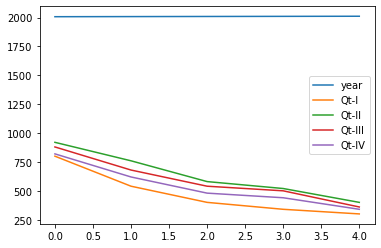

In [31]:
df.plot()

In [32]:
# Convert the data frame into numpy one dimentional array
serie = df.iloc[:, 1:]
serie = np.reshape(np.array(serie), 20)
serie

array([800, 920, 880, 820, 540, 760, 680, 620, 400, 580, 540, 480, 340,
       520, 500, 440, 300, 400, 360, 340], dtype=int64)

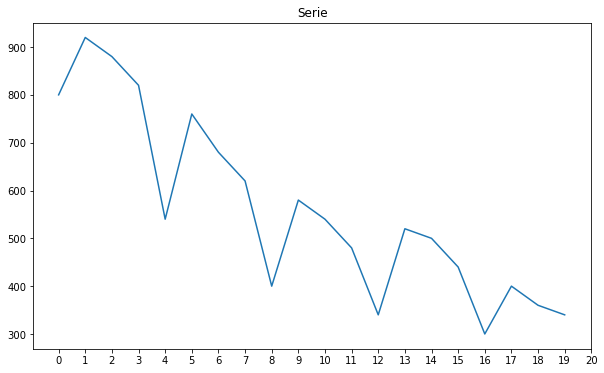

In [33]:
# Plot the serie's data
plt.figure(figsize=(10, 6))
sns.lineplot(data=serie)
plt.xticks(range(0, 21))
plt.title('Serie')
plt.show()

* Interpretation : We can detect an upward trend and seasonality form the given serie

In [34]:
# Compute the mean of each year
df['x'] = df.iloc[:, 1:].mean(axis=1)
# Sum of x
sum_x = df['x'].sum()
# Define t value (time parameter)
df['t'] = range(-2, 3)
# Sum of t
sum_t = df['t'].sum()
# Compute t square
df['t2'] = df['t']**2
# sum of t square
sum_t_square = df['t2'].sum()
# Compute the product x into t
df['x*t'] = df['x'] * df['t']
# Compute the sum of x times t
sum_xt = df['x*t'].sum() 

In [35]:
df

,year,Qt-I,Qt-II,Qt-III,Qt-IV,x,t,t2,x*t
0,2008,800,920,880,820,855.0,-2,4,-1710.0
1,2009,540,760,680,620,650.0,-1,1,-650.0
2,2010,400,580,540,480,500.0,0,0,0.0
3,2011,340,520,500,440,450.0,1,1,450.0
4,2012,300,400,360,340,350.0,2,4,700.0


* Using the least square method, calculate the regression line for the given data

In [36]:
# Equation line is : y = b0 + b1 * t
# In this case the sum of t is equal to 0 so the formula is :
b1 = -(df['x'].size * sum_xt)/ ( -(df['x'].size * sum_t_square))
b0 = df['x'].mean() - df['t'].mean() * b1

print(f'Slope : {b1}\nIntercept : {b0}') 
print(f'The line equation is y = {int(b1)}*t + {int(b0)}')

Slope : -121.0
Intercept : 561.0
The line equation is y = -121*t + 561


In [37]:
###compute the trend using the equation line
df['trend'] = df['t'].apply(lambda t: -121*t + 561)
df

,year,Qt-I,Qt-II,Qt-III,Qt-IV,x,t,t2,x*t,trend
0,2008,800,920,880,820,855.0,-2,4,-1710.0,803
1,2009,540,760,680,620,650.0,-1,1,-650.0,682
2,2010,400,580,540,480,500.0,0,0,0.0,561
3,2011,340,520,500,440,450.0,1,1,450.0,440
4,2012,300,400,360,340,350.0,2,4,700.0,319


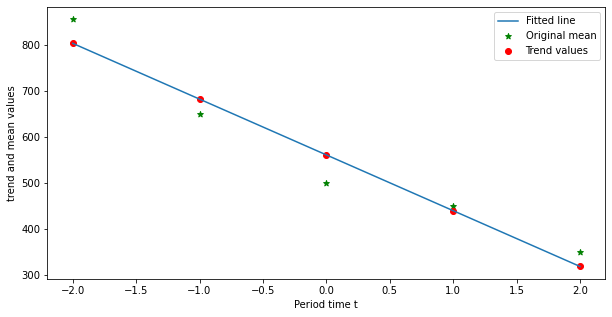

In [38]:
### plot the best fit line

plt.figure(figsize=(10, 5))
# Scatter plot of the x
plt.scatter(df['t'], df['x'], marker='*', color='green')
# Plot the fitted line
t = np.arange(-2, 3)
plt.plot(t, -121*t + 561)
# Plot the trend value by using the predicted values
plt.scatter(df['t'], df['trend'], color='red')
# Label axis and legend
plt.xlabel('Period time t')
plt.ylabel('trend and mean values')
plt.legend(['Fitted line', 'Original mean', 'Trend values'], loc='best')
plt.show()

In [39]:
# Calculate the trend effect for quaters
trend_effect = b1 / 4
print(f'Trend effect for quaters {trend_effect}')

Trend effect for quaters -30.25


In [40]:
# Create dictionnay to remove the trend from the data
dict = {
    'year' : df['year'].values,
    'Qt-I' : df['trend'] - trend_effect,
    'Qt-II' : df['trend'] - (trend_effect/2),
    'Qt-III' : df['trend'] + (trend_effect/2),
    'Qt-IV' : df['trend'] + trend_effect 
}

# Store into a new dataset
new_data = pd.DataFrame(dict)
new_data

,year,Qt-I,Qt-II,Qt-III,Qt-IV
0,2008,833.25,818.125,787.875,772.75
1,2009,712.25,697.125,666.875,651.75
2,2010,591.25,576.125,545.875,530.75
3,2011,470.25,455.125,424.875,409.75
4,2012,349.25,334.125,303.875,288.75


In [41]:
#  Remove the trend from the data Using ratio method
new_data = pd.concat([df.year, df.iloc[:,1:5] / new_data.iloc[:, 1:] * 100], axis=1)
new_data

,year,Qt-I,Qt-II,Qt-III,Qt-IV
0,2008,96.009601,112.452254,111.692845,106.114526
1,2009,75.816076,109.019186,101.968135,95.128500
2,2010,67.653277,100.672597,98.923746,90.438059
3,2011,72.301967,114.254326,117.681671,107.382550
4,2012,85.898354,119.715675,118.469766,117.748918


#### Plot the serie after removing the trend from the data


In [42]:
# Convert the data frame into numpy one dimentional array
serie = new_data.iloc[:, 1:]
serie = np.reshape(np.array(serie), 20)
serie

array([ 96.00960096, 112.45225363, 111.69284468, 106.11452604,
        75.81607582, 109.01918594, 101.96813496,  95.12850019,
        67.65327696, 100.67259709,  98.92374628,  90.43805935,
        72.30196704, 114.25432573, 117.68167108, 107.38255034,
        85.89835361, 119.71567527, 118.46976553, 117.74891775])

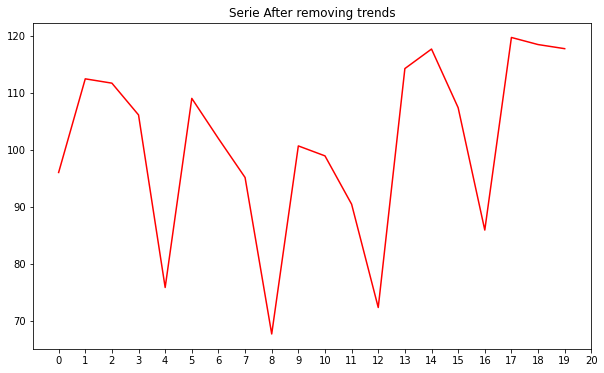

In [43]:
# Plot the serie's data
plt.figure(figsize=(10, 6))
sns.lineplot(data=serie, color='red')
plt.title('Serie After removing trends')
plt.xticks(range(0, 21))
plt.show()

In [44]:
# Seasonal values
List = [new_data.iloc[:,i].mean() for i in range(1, 5)]
sum =  np.sum(List)
print(f'Sum up the yearly average seaonality {sum}')

Sum up the yearly average seaonality 403.8684056493646


In [45]:
# Calculate the value of the correction factor k
k = 400 / sum
print('The correction factor k is', k)

The correction factor k is 0.9904216185389775


In [46]:
# Add the seasonal indices for the dataset
seasonal = np.array(List) * k
print(seasonal.tolist())

[78.77403011925317, 110.15747305618453, 108.69603164721936, 102.372465177343]
